In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -Uqq  patool
!pip install -Uqq fastai

     |████████████████████████████████| 77 kB 2.8 MB/s 
     |████████████████████████████████| 189 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 


In [3]:
import os
import shutil
import patoolib
import pandas as pd
from pathlib import Path
from tqdm import tqdm

In [4]:
patoolib.extract_archive('/content/drive/MyDrive/Colab Notebooks/pathshala/unsorted/bangla/number/NumtaDB.rar')

patool: Extracting /content/drive/MyDrive/Colab Notebooks/pathshala/unsorted/bangla/number/NumtaDB.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Colab Notebooks/pathshala/unsorted/bangla/number/NumtaDB.rar"
patool:     with cwd='./Unpack_1s9ve6ex'
patool: ... /content/drive/MyDrive/Colab Notebooks/pathshala/unsorted/bangla/number/NumtaDB.rar extracted to `Numta_Workshop'.


'Numta_Workshop'

In [50]:
shutil.rmtree(Path('/content/numta'))

In [51]:
folders = ['a', 'b', 'c', 'd']
my_path = []
for folder in tqdm(folders):
    root_path = Path(f'/content/Numta_Workshop/training-{folder}')
    label = pd.read_csv(str(root_path)+'.csv')
    label = label.set_index('filename')
    label = label[['digit']]
    label = label.to_dict()
    files = os.listdir(root_path)
    files.sort()
    for f in files:
        if f != 'Thumbs.db':
            my_path.append((root_path/f , label['digit'][f]))
        else:
            print("FUCK")
    
len(my_path)

  0%|          | 0/4 [00:00<?, ?it/s]

FUCK


100%|██████████| 4/4 [00:00<00:00,  5.00it/s]


55267

In [52]:
for i in tqdm(my_path):
    original, num = i
    target = Path('/content/numta')
    file_name = (f"{num:02}_"+original.parts[-1])
    if not os.path.isdir(target):
        os.mkdir(target)

    shutil.copyfile(original, target/file_name)

100%|██████████| 55267/55267 [00:21<00:00, 2557.28it/s]


In [53]:
new_files = os.listdir(target)
new_files.sort()

In [54]:
import numpy as np
from fastcore.xtras import Path # @patch'd properties to the Pathlib module

from fastai.callback.fp16 import to_fp16
from fastai.callback.schedule import fit_one_cycle, lr_find 

from fastai.data.block import CategoryBlock, DataBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, Normalize, RandomSplitter, RegexLabeller

from fastai.interpret import ClassificationInterpretation
from fastai.learner import Learner # imports @patch'd properties to Learner including `save`, `load`, `freeze`, and `unfreeze`

from fastai.metrics import error_rate, accuracy

from fastai.vision.augment import aug_transforms, RandomResizedCrop, Resize
from fastai.vision.core import imagenet_stats
from fastai.vision.data import ImageDataLoaders, ImageBlock
from fastai.vision.learner import cnn_learner

In [55]:
imgs_path = Path("/content/numta")

In [56]:
fnames = get_image_files(imgs_path)

In [57]:
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=64

In [68]:
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0, do_flip=False), Normalize.from_stats(*imagenet_stats)]
bs=64

In [69]:
def ret_cat(x):
    return int(x[0:2])

In [72]:
dls = ImageDataLoaders.from_name_func(
    imgs_path, fnames, 
    valid_pct=0.2, seed=307,bs = bs,
    label_func=ret_cat, #item_tfms=Resize(224),batch_tfms=batch_tfms) 
    item_tfms=item_tfms,batch_tfms=batch_tfms)

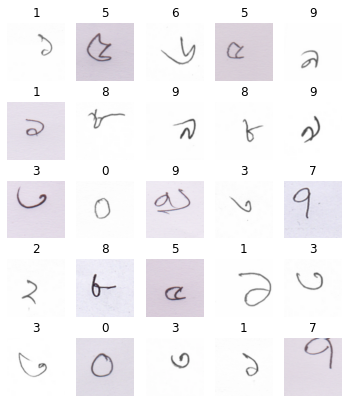

In [79]:
dls.show_batch(max_n=25, figsize=(6,7))